<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/AproriVsFpGrowthRunTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fp Growth

In [63]:
pip install pyfpgrowth

In [64]:
import pyfpgrowth

In [65]:
import pandas as pd
df = pd.read_csv('/content/breast_train_transactions.txt', header = None, sep="," , names=['a','b','c', 'd', 'e', 'f','g', 'h', 'i', 'k'])

In [66]:
df.head(5)

,a,b,c,d,e,f,g,h,i,k
0,class@no,a1@30-39,a2@premeno,a3@30-34,a4@0-2,a5@no,a6@3,a7@left,a8@left_low,a9@no
1,class@no,a1@40-49,a2@premeno,a3@20-24,a4@0-2,a5@no,a6@2,a7@right,a8@right_up,a9@no
2,class@no,a1@40-49,a2@premeno,a3@20-24,a4@0-2,a5@no,a6@2,a7@left,a8@left_low,a9@no
3,class@no,a1@60-69,a2@ge40,a3@15-19,a4@0-2,a5@no,a6@2,a7@right,a8@left_up,a9@no
4,class@no,a1@40-49,a2@premeno,a3@0-4,a4@0-2,a5@no,a6@2,a7@right,a8@right_low,a9@no


In [67]:
trans = df.values.tolist()

In [68]:
patterns = pyfpgrowth.find_frequent_patterns(trans, .01)

In [69]:
min_sup = [ .01, .02,.03,.04, .05, .1, .2, .5, .6]

In [70]:
import time
run_time_fp = []
for i in min_sup:
    print(i)
    start_time = time.time()
    patterns = pyfpgrowth.find_frequent_patterns(trans, i)
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_fp.append(time.time() - start_time)
  
run_time_fp

0.01
For 0--- 0.9890756607055664 seconds ---
0.02
For 0--- 1.1889348030090332 seconds ---
0.03
For 0--- 0.935905933380127 seconds ---
0.04
For 0--- 0.9489452838897705 seconds ---
0.05
For 0--- 0.940373420715332 seconds ---
0.1
For 0--- 1.1840524673461914 seconds ---
0.2
For 0--- 0.9772500991821289 seconds ---
0.5
For 0--- 0.9380173683166504 seconds ---
0.6
For 0--- 0.9428000450134277 seconds ---


[0.9895493984222412,
 1.189368724822998,
 0.9360530376434326,
 0.9491057395935059,
 0.9408206939697266,
 1.1846950054168701,
 0.9776861667633057,
 0.938169002532959,
 0.9429442882537842]

Apriori

In [71]:
pip install apriori_python

In [72]:
from apriori_python import apriori

In [73]:
min_sup = [.01, .02,.03,.04, .05, .1, .2, .5, .6]
import time
run_time_apr = []
for i in min_sup:
    print(i)
    start_time = time.time()
    freqItemSet, rules = apriori(trans, minSup=i, minConf=0.5)
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_apr.append(time.time() - start_time)
  
run_time_apr

0.01
For 0--- 93.00619173049927 seconds ---
0.02
For 0--- 17.620357275009155 seconds ---
0.03
For 0--- 3.818026065826416 seconds ---
0.04
For 0--- 2.5916380882263184 seconds ---
0.05
For 0--- 1.5137591361999512 seconds ---
0.1
For 0--- 0.24466729164123535 seconds ---
0.2
For 0--- 0.05085301399230957 seconds ---
0.5
For 0--- 0.008196830749511719 seconds ---
0.6
For 0--- 0.006341457366943359 seconds ---


[93.00688743591309,
 17.62087392807007,
 3.8181872367858887,
 2.5921096801757812,
 1.5139145851135254,
 0.2448122501373291,
 0.051165103912353516,
 0.008432149887084961,
 0.0065343379974365234]

In [74]:
#plot it
import seaborn as sns

In [75]:
df = pd.DataFrame({'Fp_Growth': run_time_fp, 'Apriori' :run_time_apr })

[Text(0, 0, '.01'),
 Text(0, 0, '.02'),
 Text(0, 0, '.03'),
 Text(0, 0, '.04'),
 Text(0, 0, '.05'),
 Text(0, 0, '.1'),
 Text(0, 0, '.2'),
 Text(0, 0, '.3'),
 Text(0, 0, '.4')]

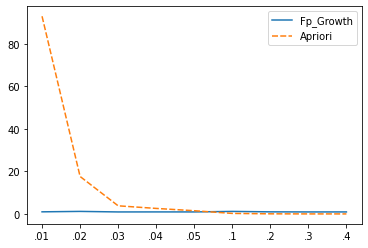

In [76]:
g = sns.lineplot(data=df)
g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels(['.01','.02', '.03','.04','.05', '.1', '.2','.3','.4', '.5', '.6'])